# Astrophysics Homework Four

## Alexandra Higley

In [1]:
import numpy as np
from pylab import *
from math import e
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from astropy.io import fits
import glob
import os

## Question 1

This problem I did partially on paper, partially here. I derived the equation for the roche limit in the written work attached. Here, I am making the calculations and comparing the roche limit of Earth to the orbital radii of Jupiter's largest moons. 

In [2]:
G = 6.67E-11
rad_j = 69.911E6
rad_e = 6.371E6
mass_e = 5.972E24
mass_j = 1.899E27

#Galilean moon orbits
Io_o = 422000000
Europa_o = 670900000
Ganymede_o =  1.070214E9
Callisto_o  =  1883000000

In [3]:
def getRoche(r,m1,m2):
    R = r*((2*m1)/m2)**(1/3)
    return R

In [4]:
lim = getRoche(rad_e, mass_j, mass_e)
print("The Roche limit of Earth if it was orbiting Jupiter is", round(lim, 3), "m, or", (round((lim/rad_j), 3)),  "Jupiter radii")

The Roche limit of Earth if it was orbiting Jupiter is 54788068.768 m, or 0.784 Jupiter radii


In [5]:
y = (0,1) #arbitraty, the plot I'm making is purely for visual representation purposes
x1 = (rad_j, rad_j)
x2 = (lim, lim)
x3 = (Io_o,Io_o)
x4 = (Europa_o,Europa_o)
x5 = (Ganymede_o,Ganymede_o)
x6 = (Callisto_o, Callisto_o)

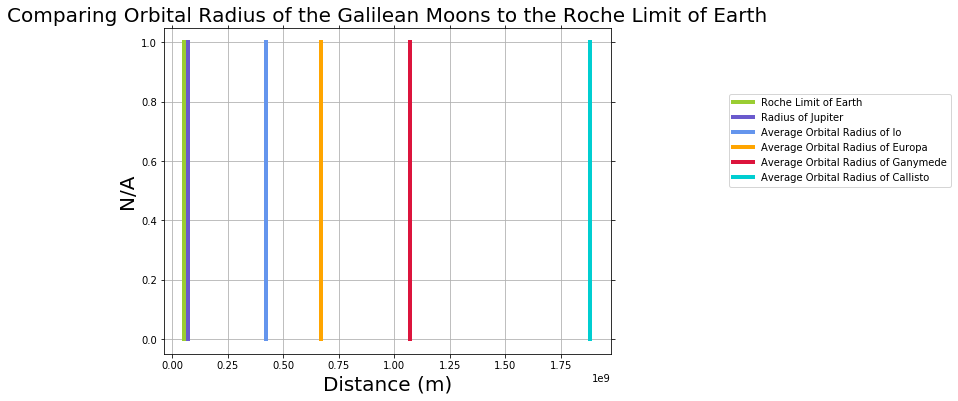

In [6]:
#plotting
fig1,ax1 =plt.subplots(figsize=(8,6))
ax1.plot(x2,y,color='yellowgreen',label='Roche Limit of Earth',linewidth='4')
ax1.plot(x1,y,color='slateblue',label='Radius of Jupiter',linewidth='4')
ax1.plot(x3,y,color='cornflowerblue',label='Average Orbital Radius of Io',linewidth='4')
ax1.plot(x4,y,color='orange',label='Average Orbital Radius of Europa',linewidth='4')
ax1.plot(x5,y,color='crimson',label='Average Orbital Radius of Ganymede',linewidth='4')
ax1.plot(x6,y,color='darkturquoise',label='Average Orbital Radius of Callisto',linewidth='4')

ax1.set_xlabel('Distance (m)',fontsize=20)
ax1.set_ylabel('N/A',fontsize=20)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

ax1.set_title("Comparing Orbital Radius of the Galilean Moons to the Roche Limit of Earth", fontsize = 20)
ax1.grid()

plt.legend(loc='lower right',bbox_to_anchor=(1.5, 0.5),bbox_transform=plt.gcf().transFigure)
plt.show()

As we can see, the Roche limit of Earth is slightly within the radius of Jupiter. This makes since because evven though Jupiter is massive, it's not a star. A star or a black hole would be capable of tearing apart an earth-sized planet with tidal forces, but perhaps a Jupiter-size planet couldn't. Regardless, I know Io is influenced by the tidal forces of Jupiter, but it also is a bit smaller, and being effected by tidal forces is a lot dofferent than being torn up by them. 

## Question 2

### Part A

This problem also has a written component where I derive how to find the time it would take for a star to impact another star. I also list all my assumptions there. Here I perform the calculations

In [7]:
N = 2E11 #stars in the Milky Way
R_max = 25E3 #pc
height = 100 #pc
v_star = 3E-4 #pc/yr
r_star = 4.5E-8 #pc
r_var = np.linspace(0,R_max,1000)

In [8]:
rho = np.empty(1000)
tau = np.empty(1000)
time = np.empty(1000)
time_log = np.empty(1000)

for i in range(1,1000):
    rho[i] = (N)/(np.pi*r_var[i]*height)
    A = np.pi*(r_star**2)
    tau[i] = (rho[i]*A)*v_star
    time[i] = tau[i]**-1
    time_log[i] = np.log(time[i])

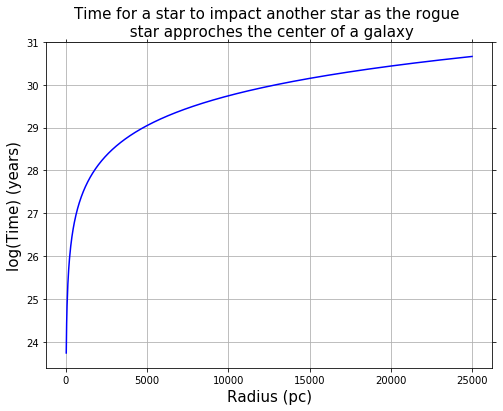

In [9]:
#plotting
fig1,ax1 =plt.subplots(figsize=(8,6))
ax1.plot(r_var[1:1000],time_log[1:1000],color='blue')


ax1.set_xlabel('Radius (pc)',fontsize=15)
ax1.set_ylabel('log(Time) (years)',fontsize=15)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

ax1.set_title("Time for a star to impact another star as the rogue \n star approches the center of a galaxy", fontsize = 15)
ax1.grid()

plt.show()

In [10]:
tot = np.sum(tau[1:1000])**-1 #years
print("it would take",round(tot),"years for the rogue star to impact another star") 

it would take 2751928466.0 years for the rogue star to impact another star


### Part B

In [11]:
dist_var = time*v_star
dist = tot*v_star
print(dist) #pc
#bigger than R_max, probably won't hit anything

825578.5398626276


## Question 3 

This question was done on paper

## Question 4

I found two ways to to do this in the book. I'm not sure which method is better, but I showed both. 

### White Dwarf

In [12]:
Msun = 1.989e+30 #kg
G = 6.67E-11
G1 = 6.67E-8 
mdot1 = 1E-6
dsun1 = 1.496e+11 #m
Mnorm = 2E33 #from notes
rwd = 6E8 #radius of white dwarf

In [13]:
sol = 3e10
fmin = 1e-6
dsun = 1.5e13 #cm
fsun = 1e6
Lsun = (4*np.pi*(dsun**2)*fsun)
etawd = 1.9e-4
mdot = 6.34e19 #g/s

In [14]:
#Method 1
Lacc1 = G1*Mnorm*mdot1*((2*(10**33))/(np.pi*(10**7)))*(1/rwd)
dstar1 = np.sqrt(Lacc1/(4*np.pi*fmin))*3.24078e-19
print("For method One I got",round(dstar1,3),"pc")

For method One I got 343.943 pc


In [15]:
#Method 2
Lacc = etawd*mdot*(sol**2)
dstar = ((np.sqrt((fsun/(Lsun*fmin))*Lacc))*dsun)*3.24078e-19
print("For method Two I got",round(dstar,3),"pc")

For method Two I got 301.014 pc


### Neutron Star

In [16]:
#Method 1
rns = 1.1e+6
Lacc21 = G1*Mnorm*mdot1*((2*(10**33))/(np.pi*(10**7)))*(1/rns)
dstar21 = np.sqrt(Lacc21/(4*np.pi*fmin))*3.24078e-19
print("For method One I got",round(dstar21,3),"pc")

For method One I got 8032.787 pc


In [17]:
#Method 2
etans = 0.21

Lacc2 = etans*mdot*(sol**2)
dstar2 = ((np.sqrt((fsun/(Lsun*fmin))*Lacc2))*dsun)*3.24078e-19
print("For method Two I got",round(dstar2,3),"pc")

For method Two I got 10007.374 pc


### Black Hole

In [18]:
#Method 1
mbh = 1.98892e+39 #g
rbh = (2*G1*mbh)/((3E10)**2)

Lacc31 = G1*Mnorm*mdot1*((2*(10**33))/(np.pi*(10**7)))*(1/rbh)
dstar31 = np.sqrt(Lacc31/(4*np.pi*fmin))*3.24078e-19
print("For Method One I got",round(dstar31,3),"pc")

For Method One I got 15.517 pc


This feels wrong, maybe I did my math wrong?

In [19]:
#Method 2
etabh = 0.42

Lacc3 = etabh*mdot*(sol**2)
dstar3 = ((np.sqrt((fsun/(Lsun*fmin))*Lacc3))*dsun)*3.24078e-19
print("For Method Two I got",round(dstar3,3),"pc")

For Method Two I got 14152.565 pc


### Question 5

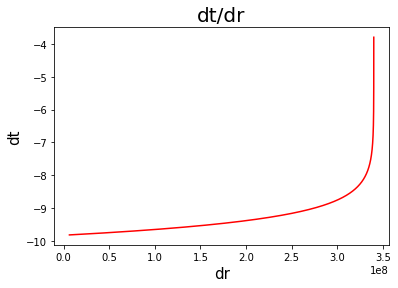

In [20]:
cons = 1/np.sqrt(2*9.81)
R = 6.378E6
r0 = 3.4E8
dx = 10000
#using this as dx so it doesn't take forever to plot. These are huge scales so this is a reasonable number to choose for dx
x = np.arange(R,r0,10000)
y = 1/(np.sqrt(r0-x))
logy = np.log(y)

plt.plot(x,logy,'r-');
plt.title("dt/dr",fontsize='20');
plt.xlabel("dr",fontsize='15');
plt.ylabel("dt",fontsize='15');

Analytically taking the integral of this function:

In [21]:
t = np.empty(len(y))
t_try = np.empty(len(y))
for i in range(len(y)):
    t_try[i] = y[i]*dx
    t[i] = np.sum(y)*dx - np.sum(t_try[:i])
    
tots = (np.max(t)*cons)
#just a different way of doing the same thing. The loop is so that my later plots start at 0 

area = np.sum(y)*dx
tr0 = cons*area
print("So the time it takes is",tr0,"seconds or 2.29 hours")

So the time it takes is 8259.301112144245 seconds or 2.29 hours


I'm not sure if I made these plots right, but this is my best guess for the time it is right now (I worked on this question last). Crazy week! Lot of midterm stuff and lab stuff going on. 

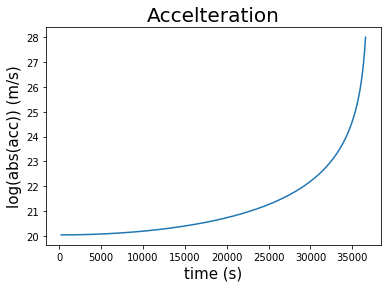

In [22]:
me = 5.972e+24 #kg
acc = np.empty(len(y))
time_s = np.empty(len(y))
for i in range(len(y)):
    acc[i] = (-9.81*me)/(x[i]**2)

for i in range(len(y)):
    time_s[i] = np.sum(y[:i])*dx

logacc = np.log(np.abs(acc));
plt.plot(t, logacc);
plt.title("Accelteration",fontsize='20')
plt.xlabel("time (s)",fontsize='15');
plt.ylabel("log(abs(acc)) (m/s)",fontsize='15');

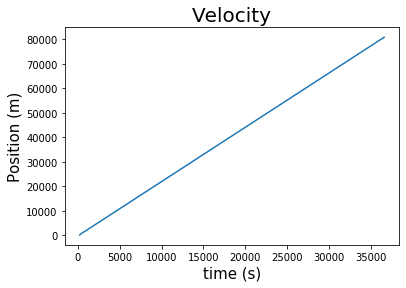

In [23]:
vel = np.empty(len(y))
for i in range(len(y)):
    vel[i] = np.sqrt(2*9.81*(r0-x[i]))
plt.plot(t, vel);
plt.title("Velocity",fontsize='20')
plt.xlabel("time (s)",fontsize='15');
plt.ylabel("Position (m)",fontsize='15');

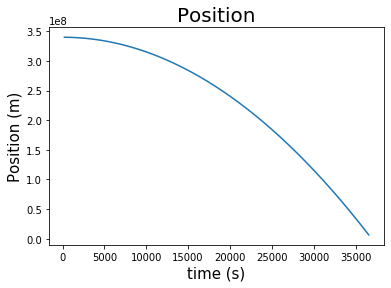

In [24]:
plt.plot(t, x);
plt.title("Position",fontsize='20')
plt.xlabel("time (s)",fontsize='15');
plt.ylabel("Position (m)",fontsize='15');
# This looks backwards for some reason 

## Question 6

For this problem I took on the top right hand quadrent. My group and I were kind-of in contact and I let them know how I did my quadrent, but I'm not sure if they made it too far (this week is pretty wild for a lot of us so I don't blame them at all). Because of this, I only have data for my quadrent. Anyways, here's what I did:

First I took note of all the galaxies that appeared in my quadrent that also appeared in the "Galaxies" folder. I did this by making a list of every galaxy listed on the image of the cluster provided, and then I used glob.glob to load in all the spectra. glob.glob was something I learned from Eleanor a few years ago. 

After that I found the locations of all the galaxies in my quadrent within the list of spectra glob.glob made. 

In [25]:
spec_list = glob.glob('/Users/alexh/Desktop/Coding/homework/astrophysics/Galaxies/*.fits')
#spec_list
#if un-comment, will list out all .fits files from Galaxies folder

In [26]:
spec = np.array(spec_list)
path = "/Users/alexh/Desktop/Coding/homework/astrophysics/Galaxies/"
quad2 = np.array(['NGC4848.fits', 'NGC4860.fits', 'NGC4858.fits', 'NGC4851.fits', 'IC3943.fits', 'NGC4865.fits', 'NGC4850.fits', 'NGC4867.fits', 'NGC4873.fits', 'NGC4874.fits', 'NGC4864.fits'])
#All the galaxies in my quadrent that were in the Galaxies folder. There was 11 of them

loc = np.where((spec == path+quad2[0])| (spec == path+quad2[1])| (spec == path+quad2[2])| (spec == path+quad2[3])|(spec == path+quad2[4])|(spec == path+quad2[5])|(spec == path+quad2[6])|(spec == path+quad2[7])|(spec == path+quad2[8])|(spec == path+quad2[9])|(spec == path+quad2[10]))
spec_q2 = (spec[loc])
#list of .fits files for my 11 galaxies

In [27]:
def line1(x,a1,mu,sig):
    y1 = 1 + a1*e**((-(x-mu)**2)/(2*sig**2))
    return y1

def line2(x,a1,mu,sig,c):
    y1 = 1 + a1*e**((-(x-mu)**2)/(2*sig**2))+c
    return y1

#defining 2 different guassians. Some of the fits wouldn't take the +c parameter so I just have both versions

In [28]:
def seespec(num):
    
    hdu = fits.open(spec_q2[num])
    
    data=hdu[0].data
    hdr = hdu[0].header
    
    
    crval1=hdr['CRVAL1']
    cdelt1=hdr['CDELT1']
    crpix1=hdr['CRPIX1']
    
    wavl=crval1 + cdelt1*(np.arange(0,len(data))-crpix1 )
    
    plt.plot(wavl,data,'k');
    plt.xlabel('Wavelength (Angstroms)');
    plt.ylabel('Relative Flux');
    plt.title(quad2[num])
    plt.show()
    
    return wavl, data

Okay, now with all the files that I need loaded in, I made a function that opened them and displayed them while returning their wavlength and flux data. 

I tried for a good while to automate the gaussian-fit process, but it didn't pan out too well. Mostly because they were all of different galaxies of different types (I was not fitting the same line for each of them and the guessed parameters for each galaxy would be different). I've made automated line-fitters for quasars before, but I already had a redshift that the pipeline guessed so I wasn't sure what else to do in this situation but to fit a gaussian to some feature in all eleven galaxies individually. Maybe eventually i could have figured out something more elegant, but fot now here's what I have. 

To find the velocity of each galaxy, I first determined if it was elliptical or spiral (spiral galaxies exhibit emission features while elliptical have absorbtion features). If it was elliptical, I found the Na feature (usually around 5900 Angstroms) and if it was spiral I found the hydrogen alpha line (usually aroung 6600 angstroms). From there I fit the guassian, found the center, used that as my observed wavelength, and then found a redshift. Note that I got the rest wavelengths for H-alpha and Na from SDSS. Also note that I mulitplied the flux by 10E13 becuase when it is on the order of -13, the gaussian has a hard time fitting because it reads it as "zero"

### Galaxy 1 - Spiral

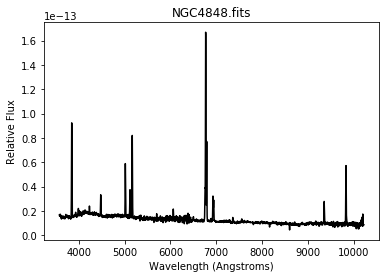

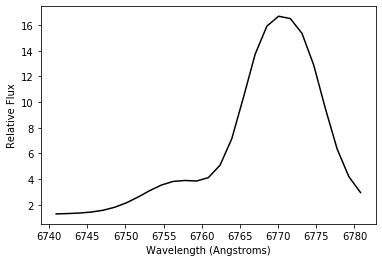

In [29]:
wav1, data1 = seespec(0)

datab1 = data1*10E13
wavarr1 = np.array(wav1)
feat1 = np.where((wavarr1 >= 6740 ) & (wavarr1 <= 6782))
halpha_wav1 = wavarr1[feat1]
halpha_flux1 = datab1[feat1]

plt.plot(halpha_wav1,halpha_flux1,'k');
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

The center is at  6770.474 Angstroms


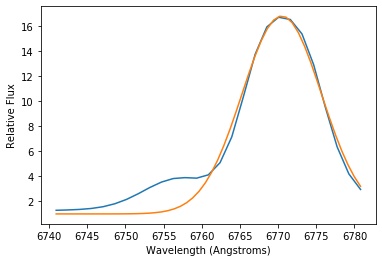

In [30]:
gg1 = np.mean(halpha_wav1)
sd1 = np.std(halpha_wav1)

p1= np.array([1,gg1,sd1])
coeff1, covar_matrix1 = curve_fit(line1, halpha_wav1, halpha_flux1,p0=p1)
xarr1=np.linspace(np.min(halpha_wav1),np.max(halpha_wav1))
yarr1=line1(xarr1,*coeff1)

cent1 = round(coeff1[1],3)
print("The center is at ", cent1 , "Angstroms")


plt.plot(halpha_wav1,halpha_flux1)
plt.plot(xarr1,yarr1)
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');


### Galaxy 2 - Elliptical

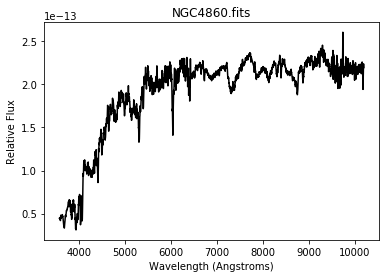

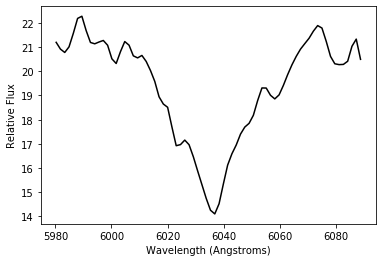

In [31]:
wav2, data2 = seespec(1)
datab2 = data2*10E13
wavarr2 = np.array(wav2)
feat2 = np.where((wavarr2 >= 5980 ) & (wavarr2 <= 6090))
halpha_wav2 = wavarr2[feat2]
halpha_flux2 = datab2[feat2]

plt.plot(halpha_wav2,halpha_flux2,'k');
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

The center is at  6035.932 Angstroms


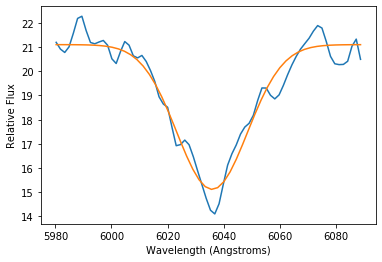

In [32]:
gg2 = np.mean(halpha_wav2)
sd2 = np.std(halpha_wav2)

p2= np.array([2,gg2,sd2,2])
coeff2, covar_matrix2 = curve_fit(line2, halpha_wav2, halpha_flux2,p0=p2)
xarr2=np.linspace(np.min(halpha_wav2),np.max(halpha_wav2))
yarr2=line2(xarr2,*coeff2)

cent2 = round(coeff2[1],3)
print("The center is at ", cent2 , "Angstroms")


plt.plot(halpha_wav2,halpha_flux2)
plt.plot(xarr2,yarr2)
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

### Galaxy 3 - Spiral

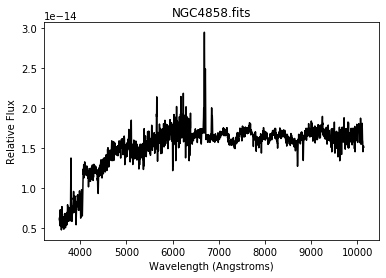

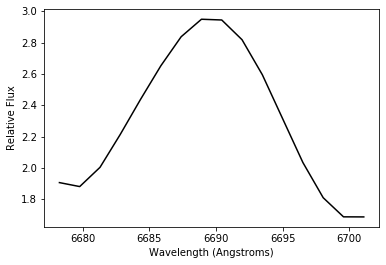

In [33]:
wav3, data3 = seespec(2)
datab3 = data3*10E13
wavarr3 = np.array(wav3)
feat3 = np.where((wavarr3 >= 6677 ) & (wavarr3 <= 6702))
halpha_wav3 = wavarr3[feat3]
halpha_flux3 = datab3[feat3]

plt.plot(halpha_wav3,halpha_flux3,'k');
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

The center is at  6689.086 Angstroms


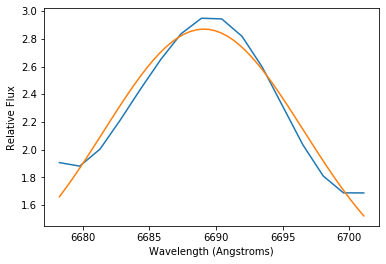

In [34]:
gg3 = np.mean(halpha_wav3)
sd3 = np.std(halpha_wav3)

p3= np.array([2,gg3,sd3])
coeff3, covar_matrix3 = curve_fit(line1, halpha_wav3, halpha_flux3,p0=p3)
xarr3=np.linspace(np.min(halpha_wav3),np.max(halpha_wav3))
yarr3=line1(xarr3,*coeff3)

cent3 = round(coeff3[1],3)
print("The center is at ", cent3 , "Angstroms")


plt.plot(halpha_wav3,halpha_flux3)
plt.plot(xarr3,yarr3)
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

### Galaxy 4 - Elliptical

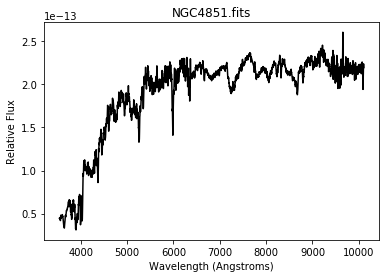

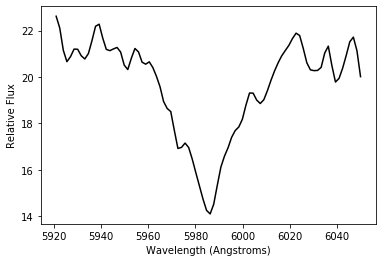

In [35]:
wav4, data4 = seespec(3)
datab4 = data4*10E13
wavarr4 = np.array(wav4)
feat4 = np.where((wavarr4 >= 5920 ) & (wavarr4 <= 6050))
halpha_wav4 = wavarr4[feat4]
halpha_flux4 = datab4[feat4]

plt.plot(halpha_wav4,halpha_flux4,'k');
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

The center is at  5985.299 Angstroms


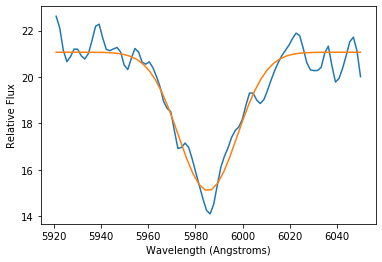

In [36]:
gg4 = np.mean(halpha_wav4)
sd4 = np.std(halpha_wav4)

p4= np.array([2,gg4,sd4,2])
coeff4, covar_matrix4 = curve_fit(line2, halpha_wav4, halpha_flux4,p0=p4)
xarr4=np.linspace(np.min(halpha_wav4),np.max(halpha_wav4))
yarr4=line2(xarr4,*coeff4)

cent4 = round(coeff4[1],3)
print("The center is at ", cent4 , "Angstroms")


plt.plot(halpha_wav4,halpha_flux4)
plt.plot(xarr4,yarr4)
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

### Galaxy 5 - Spiral

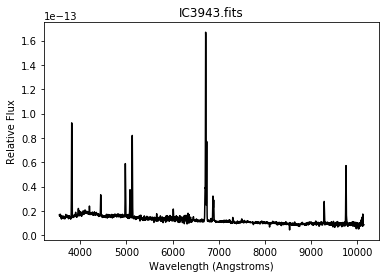

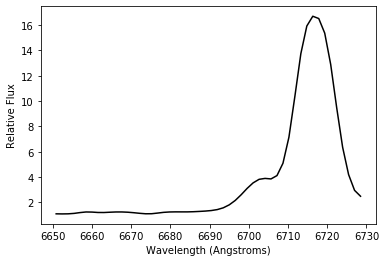

In [37]:
wav5, data5 = seespec(4)
datab5 = data5*10E13
wavarr5 = np.array(wav5)
feat5 = np.where((wavarr5 >= 6650 ) & (wavarr5 <= 6730))
halpha_wav5 = wavarr5[feat5]
halpha_flux5 = datab5[feat5]

plt.plot(halpha_wav5,halpha_flux5,'k');
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

The center is at  6716.744 Angstroms


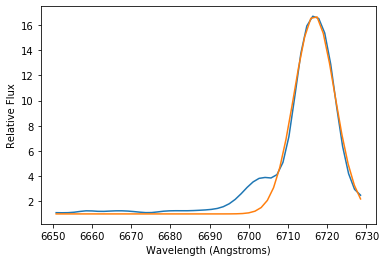

In [38]:
gg5 = np.mean(halpha_wav5)
sd5 = np.std(halpha_wav5)

p5= np.array([2,gg5,sd5])
coeff5, covar_matrix5 = curve_fit(line1, halpha_wav5, halpha_flux5,p0=p5)
xarr5=np.linspace(np.min(halpha_wav5),np.max(halpha_wav5))
yarr5=line1(xarr5,*coeff5)

cent5 = round(coeff5[1],3)
print("The center is at ", cent5 , "Angstroms")


plt.plot(halpha_wav5,halpha_flux5)
plt.plot(xarr5,yarr5)
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

### Galaxy 6 - Elliptical

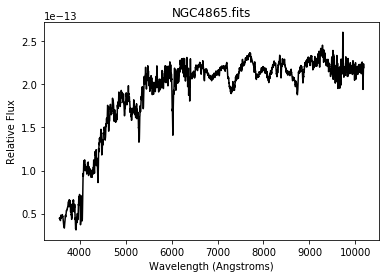

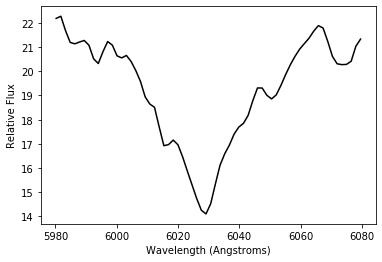

In [39]:
wav6, data6 = seespec(5)
datab6 = data6*10E13
wavarr6 = np.array(wav6)
feat6 = np.where((wavarr6 >= 5980 ) & (wavarr6 <= 6080))
halpha_wav6 = wavarr6[feat6]
halpha_flux6 = datab6[feat6]

plt.plot(halpha_wav6,halpha_flux6,'k');
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

The center is at  6028.229 Angstroms


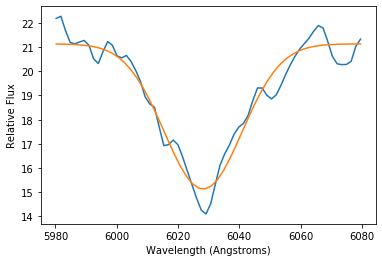

In [40]:
gg6 = np.mean(halpha_wav6)
sd6 = np.std(halpha_wav6)

p6= np.array([2,gg6,sd6,2])
coeff6, covar_matrix6 = curve_fit(line2, halpha_wav6, halpha_flux6,p0=p6)
xarr6=np.linspace(np.min(halpha_wav6),np.max(halpha_wav6))
yarr6=line2(xarr6,*coeff6)

cent6 = round(coeff6[1],3)
print("The center is at ", cent6 , "Angstroms")


plt.plot(halpha_wav6,halpha_flux6)
plt.plot(xarr6,yarr6)
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

### Galaxy 7 - Spiral

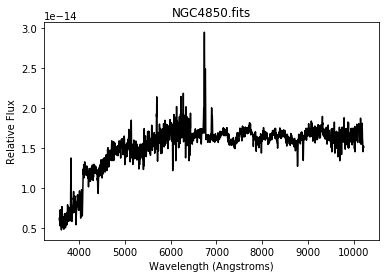

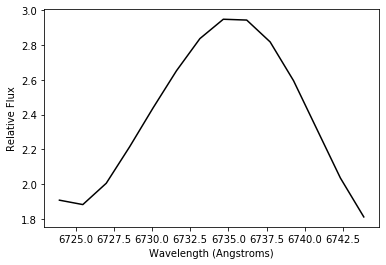

In [41]:
wav7, data7 = seespec(6)
datab7 = data7*10E13
wavarr7 = np.array(wav7)
feat7 = np.where((wavarr7 >= 6723 ) & (wavarr7 <= 6745))
halpha_wav7 = wavarr7[feat7]
halpha_flux7 = datab7[feat7]

plt.plot(halpha_wav7,halpha_flux7,'k');
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

The center is at  6734.756 Angstroms


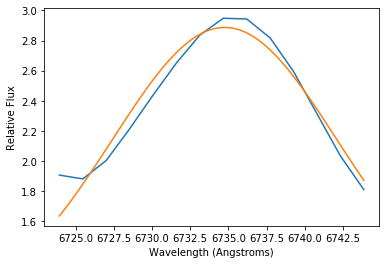

In [42]:
gg7 = np.mean(halpha_wav7)
sd7 = np.std(halpha_wav7)

p7= np.array([2,gg7,sd7])
coeff7, covar_matrix7 = curve_fit(line1, halpha_wav7, halpha_flux7,p0=p7)
xarr7=np.linspace(np.min(halpha_wav7),np.max(halpha_wav7))
yarr7=line1(xarr7,*coeff7)

cent7 = round(coeff7[1],3)
print("The center is at ", cent7 , "Angstroms")


plt.plot(halpha_wav7,halpha_flux7)
plt.plot(xarr7,yarr7)
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

### Galaxy 8 - Elliptical

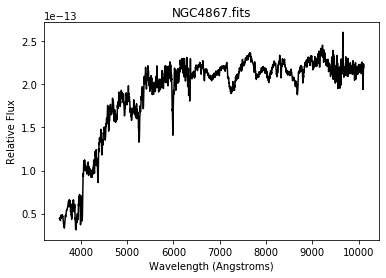

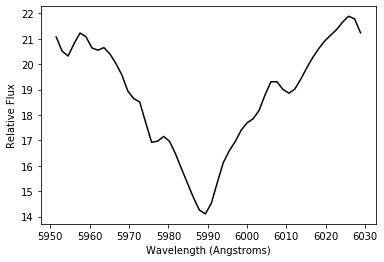

In [43]:
wav8, data8 = seespec(7)
datab8 = data8*10E13
wavarr8 = np.array(wav8)
feat8 = np.where((wavarr8 >= 5950 ) & (wavarr8 <= 6030))
halpha_wav8 = wavarr8[feat8]
halpha_flux8 = datab8[feat8]

plt.plot(halpha_wav8,halpha_flux8,'k');
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

The center is at  5988.489 Angstroms


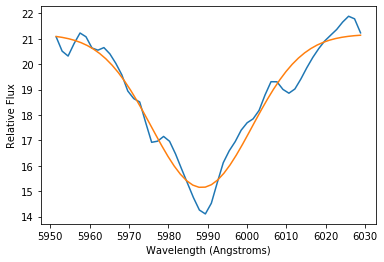

In [44]:
gg8 = np.mean(halpha_wav8)
sd8 = np.std(halpha_wav8)

p8= np.array([2,gg8,sd8,2])
coeff8, covar_matrix8 = curve_fit(line2, halpha_wav8, halpha_flux8,p0=p8)
xarr8=np.linspace(np.min(halpha_wav8),np.max(halpha_wav8))
yarr8=line2(xarr8,*coeff8)

cent8 = round(coeff8[1],3)
print("The center is at ", cent8 , "Angstroms")


plt.plot(halpha_wav8,halpha_flux8)
plt.plot(xarr8,yarr8)
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

### Galaxy 9 - Spiral

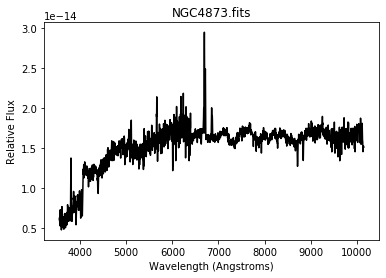

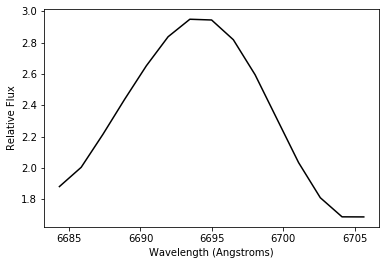

In [45]:
wav9, data9 = seespec(8)
datab9 = data9*10E13
wavarr9 = np.array(wav9)
feat9 = np.where((wavarr9 >= 6683 ) & (wavarr9 <= 6707))
halpha_wav9 = wavarr9[feat9]
halpha_flux9 = datab9[feat9]

plt.plot(halpha_wav9,halpha_flux9,'k');
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

The center is at  6693.828 Angstroms


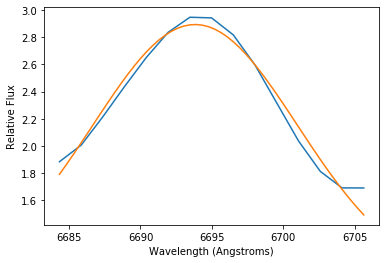

In [46]:
gg9 = np.mean(halpha_wav9)
sd9 = np.std(halpha_wav9)

p9= np.array([2,gg9,sd9])
coeff9, covar_matrix9 = curve_fit(line1, halpha_wav9, halpha_flux9,p0=p9)
xarr9=np.linspace(np.min(halpha_wav9),np.max(halpha_wav9))
yarr9=line1(xarr9,*coeff9)

cent9 = round(coeff9[1],3)
print("The center is at ", cent9 , "Angstroms")


plt.plot(halpha_wav9,halpha_flux9)
plt.plot(xarr9,yarr9)
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

### Galaxy 10 - Spiral

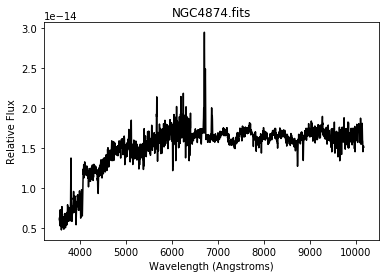

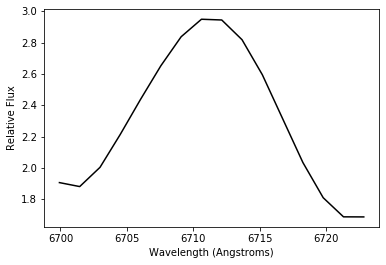

In [47]:
wav10, data10 = seespec(9)
datab10 = data10*10E13
wavarr10 = np.array(wav10)
feat10 = np.where((wavarr10 >= 6699 ) & (wavarr10 <= 6723))
halpha_wav10 = wavarr10[feat10]
halpha_flux10 = datab10[feat10]

plt.plot(halpha_wav10,halpha_flux10,'k');
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

The center is at  6710.903 Angstroms


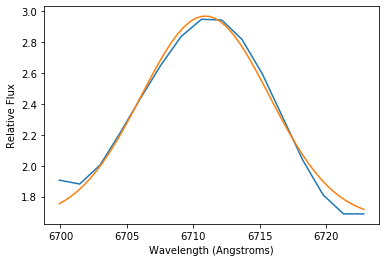

In [48]:
gg10 = np.mean(halpha_wav10)
sd10 = np.std(halpha_wav10)

p10= np.array([2,gg10,sd10,2])
coeff10, covar_matrix10 = curve_fit(line2, halpha_wav10, halpha_flux10,p0=p10)
xarr10=np.linspace(np.min(halpha_wav10),np.max(halpha_wav10))
yarr10=line2(xarr10,*coeff10)

cent10 = round(coeff10[1],3)
print("The center is at ", cent10 , "Angstroms")


plt.plot(halpha_wav10,halpha_flux10)
plt.plot(xarr10,yarr10)
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

### Galaxy 11 - Elliptical

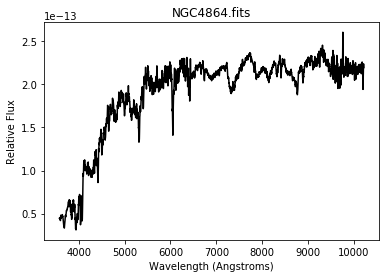

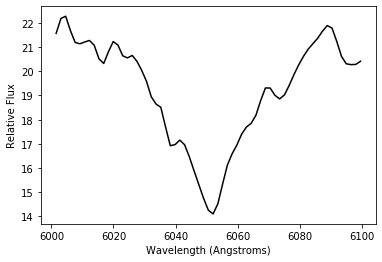

In [49]:
wav11, data11 = seespec(10)
datab11 = data11*10E13
wavarr11 = np.array(wav11)
feat11 = np.where((wavarr11 >= 6000 ) & (wavarr11 <= 6100))
halpha_wav11 = wavarr11[feat11]
halpha_flux11 = datab11[feat11]

plt.plot(halpha_wav11,halpha_flux11,'k');
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

The center is at  6051.194 Angstroms


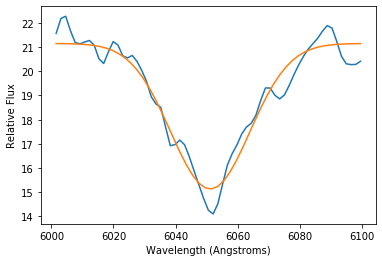

In [50]:
gg11 = np.mean(halpha_wav11)
sd11 = np.std(halpha_wav11)

p11= np.array([2,gg11,sd11,2])
coeff11, covar_matrix10 = curve_fit(line2, halpha_wav11, halpha_flux11,p0=p11)
xarr11=np.linspace(np.min(halpha_wav11),np.max(halpha_wav11))
yarr11=line2(xarr11,*coeff11)

cent11 = round(coeff11[1],3)
print("The center is at ", cent11 , "Angstroms")


plt.plot(halpha_wav11,halpha_flux11)
plt.plot(xarr11,yarr11)
plt.xlabel('Wavelength (Angstroms)');
plt.ylabel('Relative Flux');

Alright, that was a lot, but now we have the centers for some known feature in all the galaxies in my quadrent. Now I'm going to find a redshift and a radial velocity for each of them

In [51]:
cent_tot = (cent1, cent2, cent3, cent4, cent5, cent6, cent7, cent8, cent9, cent10, cent11)
cent_ha = (cent1, cent3, cent5, cent7, cent9, cent10)
cent_na = (cent2, cent4, cent6, cent8, cent11)

In [52]:
ha = 6564.61 #rest wav of h alpha
na = 5895.6 #rest wav of Na

In [53]:
c = 300000 #km/s
z_ha = np.empty(6)
v_ha = np.empty(6)

for i in range(6):
    z_ha[i] = (cent_ha[i] - ha)/ha
    v_ha[i] = c*z_ha[i]


In [54]:
z_na = np.empty(5)
v_na = np.empty(5)

for i in range(5):
    z_na[i] = (cent_na[i] - na)/na
    v_na[i] = c*z_na[i]

z_all = (z_na[0],z_na[1],z_na[2],z_na[3],z_na[4],z_ha[0],z_ha[1],z_ha[2],z_ha[3],z_ha[4],z_ha[5])
v_all = (v_na[0],v_na[1],v_na[2],v_na[3],v_na[4],v_ha[0],v_ha[1],v_ha[2],v_ha[3],v_ha[4],v_ha[5])

print("-Redshifts-")
for i in range(11):
    print(quad2[i], "has a redshift of",round(z_all[i],4))
    
print('\n-Velocities-')
    
for i in range(11):
    print(quad2[i], "has a radial velocity of",round(v_all[i],4),"km/s")

-Redshifts-
NGC4848.fits has a redshift of 0.0238
NGC4860.fits has a redshift of 0.0152
NGC4858.fits has a redshift of 0.0225
NGC4851.fits has a redshift of 0.0158
IC3943.fits has a redshift of 0.0264
NGC4865.fits has a redshift of 0.0314
NGC4850.fits has a redshift of 0.019
NGC4867.fits has a redshift of 0.0232
NGC4873.fits has a redshift of 0.0259
NGC4874.fits has a redshift of 0.0197
NGC4864.fits has a redshift of 0.0223

-Velocities-
NGC4848.fits has a radial velocity of 7140.8508 km/s
NGC4860.fits has a radial velocity of 4564.37 km/s
NGC4858.fits has a radial velocity of 6748.8805 km/s
NGC4851.fits has a radial velocity of 4726.6945 km/s
IC3943.fits has a radial velocity of 7917.4639 km/s
NGC4865.fits has a radial velocity of 9407.9009 km/s
NGC4850.fits has a radial velocity of 5688.5024 km/s
NGC4867.fits has a radial velocity of 6952.4618 km/s
NGC4873.fits has a radial velocity of 7775.6028 km/s
NGC4874.fits has a radial velocity of 5905.2099 km/s
NGC4864.fits has a radial veloc

To find the distance, I used the hubble method using a hibble constant that I used in a previous homework assigment. 

In [55]:
Hubble = 70.0 #km/sec/Mpc

dist_a = np.empty(11) #Mpc

for i in range(11):
    dist_a[i] = v_all[i]/Hubble

dist_guess = np.mean(dist_a) #Mpc
print("I am guessing the Coma Cluster to be about",round(dist_guess,3),"Mpc away")

I am guessing the Coma Cluster to be about 95.472 Mpc away


Okay. For the next parts of this question I did a lot of guesswork. I also have some written work that is attached at the end that shows my scale map that I used (I did all of it on my ipad though so "1 mm" on that work is not actually 1 mm if you were to print out the map). 

I chose NGC4848 and NGC4850 as my galaxies that were relativley N-S relative to each other. When I knew their how far away they were from each other figured out how many milimmeters that was and used that to find my scale

NGC4848 --> 97.90 Mpc

NGC4850 --> 88.30 Mpc

The distance between them is 9.6 Mpc

In [56]:
p = 9.6E6 #pc
sep = 1/p
scale = sep/17.5 #mm
print("My scale is",scale,"arcseconds/mm")

My scale is 5.9523809523809525e-09 arcseconds/mm


I then measured the distance (in mm) to all of my galaxies from the center of the cluster (I took the orgin of all the quadrents to be the center of the cluster). Then I could use my scale to turn the milimeter measurement into how many kpc the galaxies were from the center. 

In [57]:
rad_mm = (28, 14, 12.7, 21, 17.3, 8.5, 18, 6.5, 2, 1, 6) 
rad_arc = np.empty(11)
rad_kpc = np.empty(11)

for i in range(11):
    rad_arc[i] = rad_mm[i]*scale
    rad_kpc[i] = ((rad_arc[i])**-1)/1000
    print(quad2[i], "has a radius of",round(rad_kpc[i]),"kpc from the center of the galaxy")

NGC4848.fits has a radius of 6000.0 kpc from the center of the galaxy
NGC4860.fits has a radius of 12000.0 kpc from the center of the galaxy
NGC4858.fits has a radius of 13228.0 kpc from the center of the galaxy
NGC4851.fits has a radius of 8000.0 kpc from the center of the galaxy
IC3943.fits has a radius of 9711.0 kpc from the center of the galaxy
NGC4865.fits has a radius of 19765.0 kpc from the center of the galaxy
NGC4850.fits has a radius of 9333.0 kpc from the center of the galaxy
NGC4867.fits has a radius of 25846.0 kpc from the center of the galaxy
NGC4873.fits has a radius of 84000.0 kpc from the center of the galaxy
NGC4874.fits has a radius of 168000.0 kpc from the center of the galaxy
NGC4864.fits has a radius of 28000.0 kpc from the center of the galaxy


In [58]:
mean_r = np.mean(rad_kpc)
print("The mean radius is ",mean_r,"kpc")

mean_v = np.mean(v_all)
print("The mean velocity is",mean_v,"km/s")

The mean radius is  34898.50201613569 kpc
The mean velocity is 6683.042539461027 km/s


I used the mean radius and the mean velocity to find a virial mass. I'm not sure if using the averages was the right move though. I felt like maybe I should have done some kind summation or figured out the dispersion of velocity more, but I'm not sure. This was my best guess. 

In [59]:
G = 6.67E-11
r_km = 1.0768552E24
mass_tot = (2*((r_km*(mean_v**2))/G))/1.989E30
print(mass_tot)
print(mass_tot/(10**13))

725061990987.8307
0.07250619909878307


I found another paper by Heisler, Tremaine, and Bahcall (1985) that showed a different way to find the virial mass. I assumed N to be 1000 galaxies and tried it out:

In [60]:
rkm_a = rad_kpc*3.086e+16
rsq = np.empty(11)
vsq = np.empty(11)

for i in range(11):
    vsq[i] = v_all[i]**2
    rsq[i] = (1/rkm_a[i])
    
test = ((3*np.pi*1000)*((np.sum(vsq))/np.sum(rsq)))/1.989E30
print(round(test,3)) #solar masses

93.104


But 93 solar masses is definetly not right so I'm sticking with my forst estimation of 7.25x10^11 solar masses. I know this is still wrong though, because we've found the coma cluster to have 1.5x10^13 solar masses (C+O page 1069), however I don't think I was extremely far off given all the jumps that were made. For one, I am only working with 11 galaxies— there's like 1000 of them in the Coma cluster. If I did this for all the fits tables in the galaxy folder, I'd have a much better estimate I think. 

I also think there was a lot of error that happened in the scaling process. To be honest I'm not sure if I even did it right, but assuming I did, just measuring the distance from the center to the galaxies could have been off by a lot, especially because 1 mm was equivilated to so much distance. Being off by a milimeter, or even a fraction of a milimeter, meant extremely large differences in distance. 

Also, where I defined the center of the cluster to be might not *actally* be the center of the cluster, and that difference could throw things off a lot because of how extreme the scale is. Or maybe I didn't do the virial method right. Maybe I wasn't supposed to take the mean. Regardless, I'm not unsatisfied with my answer, even though it is off by two magnitudes. The other big reason why I thought my value is wrong is *maybe* because of dark matter, but I don't know if the virial method would account for that or not. Also dust and gas weren't accounted for. 

Finally, I don't have a all the velocities for every galaxy, but I do have the velocities for mine. Even though there isn't much data, here is my histogram and guassian fit of the velocities for my galaxies in quadrent 2:

** EDIT 

MJ just emailed me his velocities for the lower right quadrent, so I am adding them to the histogram. It is very late though, so I am not going to use his numbers for my other calculations. 

In [61]:
Mj = (5819.974368229879, 6510.666755996964, 7198.870309919829, 6593.592152325375,
6825.928055752255, 6842.31088038668, 7699.552376935696, 7674.095159158324,
8391.811179343815, 7046.146457225855, 6773.724333343474, 7194.845273183496,
8053.283350357746)

v_more = (v_all[0],v_all[1],v_all[2],v_all[3],v_all[4],v_all[5],v_all[6],v_all[7],v_all[8],v_all[9],v_all[10], Mj[0],Mj[1],Mj[2],Mj[3],Mj[4],Mj[5],Mj[6],Mj[7],Mj[8],Mj[9],Mj[10],Mj[11],Mj[12])

BIN EDGES:  [4564.37003867 5256.30301174 5948.23598481 6640.16895788 7332.10193095
 8024.03490402 8715.96787709]
BIN CENTERS:  [4910.3364 5602.2695 6294.2026 6986.1353 7678.0684 8370.001  9061.935 ]
COUNTS:  [ 2  3  2 10  4  2  1]


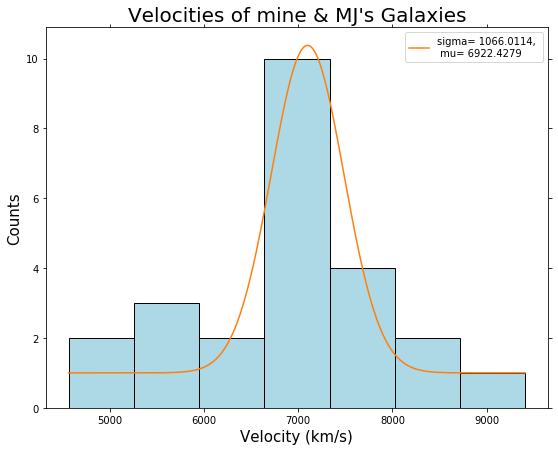

In [62]:
data1 = np.array(v_more)
#array of data

counts1,bins1 = np.histogram(data1, bins=7)
#making counts and bins
mu1 = np.mean(data1)
sigma1 = np.std(data1)

binmid1 = np.zeros(7,dtype='f4')
for i in range(7):
    binmid1[i] = (bins1[i+1]+bins1[i])/2.0
#***Note that the range is how many bins you want and the
#length of the new array for the midpoint is also the length
#og how many bins you want

print('BIN EDGES: ', bins1[:-1])
#:-1 because there is one more bin edge than count
#you want all bin edges but last
print('BIN CENTERS: ', binmid1)
print('COUNTS: ', counts1)

p1= np.array([1,mu1,sigma1])
popt1, pcov1 = curve_fit(line1, binmid1, counts1, p0=p1)
xarr1 = np.linspace(np.min(data1),np.max(data1), 1000)
yarr1 = line1(xarr1, *popt1)

fig1,ax1 =plt.subplots(figsize=(9,7))
#ax2.hist(bins[:-1],bins, edgecolor='black', facecolor='cornflowerblue',weights=counts)
ax1.hist(bins1[:-1],bins1, edgecolor='black', facecolor='lightblue',weights=counts1)
ax1.plot(xarr1,yarr1)

ax1.set_xlabel('Velocity (km/s)',fontsize=15)
ax1.set_ylabel('Counts',fontsize=15)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

ax1.set_title("Velocities of mine & MJ's Galaxies", fontsize = 20)
plt.legend(["sigma= {}, \n mu= {}".format(round(sigma1,4),round(mu1,4))])
#plt.legend()
plt.show()